In [4]:
import pandas as pd

In [5]:
# Read the CSV files
history = pd.read_csv('../data/results/history_final.csv', index_col=0)
ssp245 = pd.read_csv('../data/results/ssp245_final.csv', index_col=0)
ssp585 = pd.read_csv('../data/results/ssp585_final.csv', index_col=0)

# Extract specific columns
precip_history = history['precip_suzhou']
precip_ssp245 = ssp245['precip_suzhou']
precip_ssp585 = ssp585['precip_suzhou']
discharge_history = history['discharge_fengqiao']
discharge_ssp245 = ssp245['discharge_fengqiao']
discharge_ssp585 = ssp585['discharge_fengqiao']
wl_history = history['wl']
wl_ssp245 = ssp245['wl']
wl_ssp585 = ssp585['wl']

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
# 对数据进行季节性分解，设置freq为365
wl_result = seasonal_decompose(precip_ssp245, model='additive', period=365)

# 绘制分解结果
wl_result.plot()
plt.show()

# 获取趋势部分
wl_trend = wl_result.trend

# Return period

在水文学中，返回周期是指某种强度的洪水或者极端天气事件发生的平均时间间隔。它常常被用来量化某种强度的事件发生的频率。这里我们假设这些水文事件服从Gumbel分布，它是处理极值数据最常用的分布之一。

In [68]:
import numpy as np
import pandas as pd
from scipy.stats import genextreme

def calculate_return_period(data, period_days=1):
    data_sorted = np.sort(data)[::-1]
    
    # Exclude zero values
    data_sorted = data_sorted[data_sorted > 0].round(2)
    
    # Calculate exceedance probabilities
    n = len(data_sorted)
    rank = np.array(range(1, n + 1))
    prob_exceedance = rank / (n + 1)
    
    # Calculate return periods
    return_period_days = 1 / prob_exceedance
    return_period_years = (return_period_days / 365.25).round(2)
    
    return return_period_years, data_sorted

# Apply the function to each data series
return_periods_precip_history, data_sorted_precip_history = calculate_return_period(precip_history)
return_periods_precip_ssp245, data_sorted_precip_ssp245 = calculate_return_period(precip_ssp245)
return_periods_precip_ssp585, data_sorted_precip_ssp585 = calculate_return_period(precip_ssp585)

# Merge data into a single DataFrame for easier plotting
df_precip = pd.concat([pd.DataFrame({'Return Period (years)': return_periods_precip_history, 
                                      'Precipitation (mm)': data_sorted_precip_history, 
                                      'Scenario': 'History'}),
                       pd.DataFrame({'Return Period (years)': return_periods_precip_ssp245, 
                                      'Precipitation (mm)': data_sorted_precip_ssp245, 
                                      'Scenario': 'SSP2-4.5'}),
                       pd.DataFrame({'Return Period (years)': return_periods_precip_ssp585, 
                                      'Precipitation (mm)': data_sorted_precip_ssp585, 
                                      'Scenario': 'SSP5-8.5'})])

# Apply the function to each data series
return_periods_discharge_history, data_sorted_discharge_history = calculate_return_period(discharge_history)
return_periods_discharge_ssp245, data_sorted_discharge_ssp245 = calculate_return_period(discharge_ssp245)
return_periods_discharge_ssp585, data_sorted_discharge_ssp585 = calculate_return_period(discharge_ssp585)

# Merge data into a single DataFrame for easier plotting
df_discharge = pd.concat([pd.DataFrame({'Return Period (years)': return_periods_discharge_history, 
                                        'Discharge (m^3/s)': data_sorted_discharge_history, 
                                        'Scenario': 'History'}),
                          pd.DataFrame({'Return Period (years)': return_periods_discharge_ssp245, 
                                        'Discharge (m^3/s)': data_sorted_discharge_ssp245, 
                                        'Scenario': 'SSP2-4.5'}),
                          pd.DataFrame({'Return Period (years)': return_periods_discharge_ssp585, 
                                        'Discharge (m^3/s)': data_sorted_discharge_ssp585, 
                                        'Scenario': 'SSP5-8.5'})])

# Apply the function to each data series for water level
return_periods_wl_history, data_sorted_wl_history = calculate_return_period(wl_history)
return_periods_wl_ssp245, data_sorted_wl_ssp245 = calculate_return_period(wl_ssp245)
return_periods_wl_ssp585, data_sorted_wl_ssp585 = calculate_return_period(wl_ssp585)

# Merge data into a single DataFrame for easier plotting
df_wl = pd.concat([pd.DataFrame({'Return Period (years)': return_periods_wl_history, 
                                  'Water Level (m)': data_sorted_wl_history, 
                                  'Scenario': 'History'}),
                   pd.DataFrame({'Return Period (years)': return_periods_wl_ssp245, 
                                 'Water Level (m)': data_sorted_wl_ssp245, 
                                 'Scenario': 'SSP2-4.5'}),
                   pd.DataFrame({'Return Period (years)': return_periods_wl_ssp585, 
                                 'Water Level (m)': data_sorted_wl_ssp585, 
                                 'Scenario': 'SSP5-8.5'})])

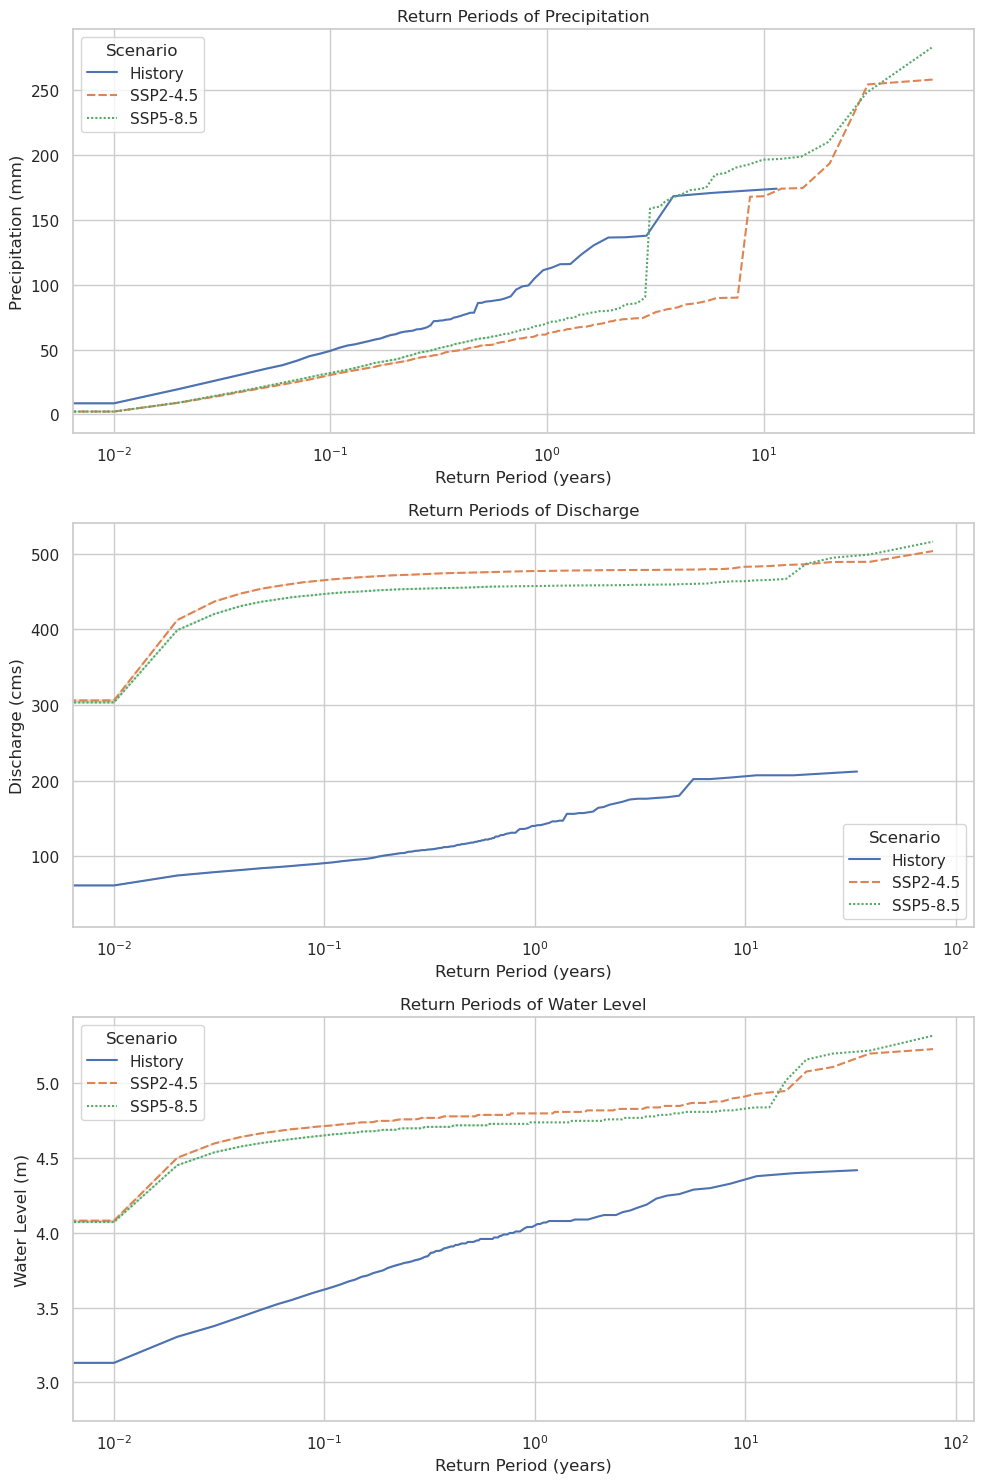

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style='whitegrid')

# Create a figure and axes
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Plot precipitation data
sns.lineplot(x='Return Period (years)', y='Precipitation (mm)', hue='Scenario', style='Scenario', data=df_precip, ax=ax[0])
ax[0].set_xscale('log')
ax[0].set_title('Return Periods of Precipitation')
ax[0].set_ylabel('Precipitation (mm)')

# Plot discharge data
sns.lineplot(x='Return Period (years)', y='Discharge (m^3/s)', hue='Scenario', style='Scenario', data=df_discharge, ax=ax[1])
ax[1].set_xscale('log')
ax[1].set_title('Return Periods of Discharge')
ax[1].set_ylabel('Discharge (cms)')

# Plot water level data
sns.lineplot(x='Return Period (years)', y='Water Level (m)', hue='Scenario', style='Scenario', data=df_wl, ax=ax[2])
ax[2].set_xscale('log')
ax[2].set_title('Return Periods of Water Level')
ax[2].set_ylabel('Water Level (m)')

# Set the xlabel for all plots
for a in ax:
    a.set_xlabel('Return Period (years)')

plt.tight_layout()
plt.show()

In [72]:
import pandas as pd
import numpy as np

def calculate_predicted_values(scenario_data, scenario_name):
    return_periods_years = [5, 10, 20, 50, 100]
    return_periods_days = np.array(return_periods_years) * 365.25
    percentiles = 100 - 1 / return_periods_days * 100
    
    predicted_values = [np.percentile(scenario_data, p) for p in percentiles]
    
    return pd.DataFrame({
        'Scenario': scenario_name,
        'Return Period (years)': return_periods_years,
        'Predicted Value': predicted_values
    })

# Apply the function to each data series for each scenario
df_precip_history = calculate_predicted_values(precip_history, 'History')
df_precip_ssp245 = calculate_predicted_values(precip_ssp245, 'SSP2-4.5')
df_precip_ssp585 = calculate_predicted_values(precip_ssp585, 'SSP5-8.5')

# Concatenate dataframes for precip
df_precip = pd.concat([df_precip_history, df_precip_ssp245, df_precip_ssp585])

# Apply the function to each data series for each scenario
df_discharge_history = calculate_predicted_values(discharge_history, 'History')
df_discharge_ssp245 = calculate_predicted_values(discharge_ssp245, 'SSP2-4.5')
df_discharge_ssp585 = calculate_predicted_values(discharge_ssp585, 'SSP5-8.5')

# Concatenate dataframes for discharge
df_discharge = pd.concat([df_discharge_history, df_discharge_ssp245, df_discharge_ssp585])

# Apply the function to each data series for each scenario
df_wl_history = calculate_predicted_values(wl_history, 'History')
df_wl_ssp245 = calculate_predicted_values(wl_ssp245, 'SSP2-4.5')
df_wl_ssp585 = calculate_predicted_values(wl_ssp585, 'SSP5-8.5')

# Concatenate dataframes for water level
df_wl = pd.concat([df_wl_history, df_wl_ssp245, df_wl_ssp585])

In [74]:
# Filter dataframes to include only 50 and 100 years return period
df_precip_filtered = df_precip[df_precip['Return Period (years)'].isin([50, 100])]
df_discharge_filtered = df_discharge[df_discharge['Return Period (years)'].isin([50, 100])]
df_wl_filtered = df_wl[df_wl['Return Period (years)'].isin([50, 100])]

# Rename columns for merge
df_precip_filtered = df_precip_filtered.rename(columns={'Predicted Value': 'Predicted Precipitation'})
df_discharge_filtered = df_discharge_filtered.rename(columns={'Predicted Value': 'Predicted Discharge'})
df_wl_filtered = df_wl_filtered.rename(columns={'Predicted Value': 'Predicted Water Level'})

# Merge dataframes
df_merged = pd.merge(df_precip_filtered, df_discharge_filtered, on=['Scenario', 'Return Period (years)'])
df_merged = pd.merge(df_merged, df_wl_filtered, on=['Scenario', 'Return Period (years)'])

In [78]:
df_merged = df_merged.round(2)
df_merged.to_csv('../data/results/return_periods.csv', index=False)

In [80]:
df_merged

,Scenario,Return Period (years),Predicted Precipitation,Predicted Discharge,Predicted Water Level
0,History,50,171.96,208.60,4.41
1,History,100,173.08,210.30,4.41
2,SSP2-4.5,50,220.55,489.25,5.15
3,SSP2-4.5,100,255.49,492.49,5.21
4,SSP5-8.5,50,226.95,496.63,5.21
5,SSP5-8.5,100,255.85,502.80,5.24


# 极值分析

# 概率密度函数分析

步骤：

1. 计算历史和预测数据的概率密度函数。
2. 将结果进行可视化。
3. 通过观察概率密度函数，分析数据的分布特性，比较历史和预测场景的变化。

# 极值分析

步骤：

1. 从历史和预测数据中提取极值（比如每年的最大水位和最大流量）。
2. 适应极值分布（如Gumbel或GEV）到提取的极值数据。
3. 通过极值分布，预测极端事件的概率。

## 提取极值

In [119]:
precip_history.index = pd.to_datetime(precip_history.index)
max_precip_history = precip_history.resample('Y').max()

precip_ssp245.index = pd.to_datetime(precip_ssp245.index)
max_precip_ssp245 = precip_ssp245.resample('Y').max()

precip_ssp585.index = pd.to_datetime(precip_ssp585.index)
max_precip_ssp585 = precip_ssp585.resample('Y').max()

from scipy.stats import gumbel_r

# Step 2: Fit extreme value distribution
params_history = gumbel_r.fit(max_precip_history)
params_ssp245 = gumbel_r.fit(max_precip_ssp245)
params_ssp585 = gumbel_r.fit(max_precip_ssp585)


import numpy as np

# Step 3: Predict extreme events
return_periods = np.array([5, 10, 20, 50, 100])  # In years
return_periods_days = return_periods * 365.25  # Convert to days

# Calculate the inverse of the CDF
extreme_values_history = gumbel_r.ppf(1 - 1/return_periods_days, *params_history)
extreme_values_ssp245 = gumbel_r.ppf(1 - 1/return_periods_days, *params_ssp245)
extreme_values_ssp585 = gumbel_r.ppf(1 - 1/return_periods_days, *params_ssp585)

print('Extreme precipitation values for return periods:', return_periods)
print('History:', extreme_values_history)
print('SSP2-4.5:', extreme_values_ssp245)
print('SSP5-8.5:', extreme_values_ssp585)


Extreme precipitation values for return periods: [  5  10  20  50 100]
History: [287.29439747 306.80755067 326.3187764  352.10982273 371.61950695]
SSP2-4.5: [245.70087512 262.88915423 280.07573551 302.79393478 319.97915822]
SSP5-8.5: [344.35526966 369.7081001  395.05842624 428.56792712 453.91625043]


In [25]:
# Assuming precip_history, precip_ssp245, and precip_ssp585 are pandas Series with a DatetimeIndex
top5_precip_history = precip_history.nlargest(5)
top5_precip_ssp245 = precip_ssp245.nlargest(5)
top5_precip_ssp585 = precip_ssp585.nlargest(5)

# Concatenate into a single DataFrame for easier viewing
df_top5 = pd.concat([top5_precip_history, top5_precip_ssp245, top5_precip_ssp585], axis=1)
df_top5.columns = ['precip_history', 'precip_ssp245', 'precip_ssp585']

# The resulting DataFrame has dates as the index and the top 5 values for each scenario as columns
print(df_top5)

            precip_history  precip_ssp245  precip_ssp585
1990-08-31           174.2            NaN            NaN
1995-06-24           136.7            NaN            NaN
2001-06-23           168.4            NaN            NaN
2012-08-08           137.9            NaN            NaN
2013-10-07           170.9            NaN            NaN
2028-08-06             NaN            NaN         248.18
2042-06-15             NaN            NaN         283.04
2060-08-23             NaN            NaN         210.26
2060-08-27             NaN         254.66            NaN
2063-08-13             NaN         174.27            NaN
2085-06-12             NaN         258.44            NaN
2086-07-18             NaN            NaN         197.14
2089-08-15             NaN         193.74            NaN
2090-10-10             NaN         174.68            NaN
2100-06-25             NaN            NaN         198.91


In [26]:
import pandas as pd

# Assuming discharge_history, discharge_ssp245, and discharge_ssp585 are pandas Series with a DatetimeIndex
top5_discharge_history = discharge_history.nlargest(5)
top5_discharge_ssp245 = discharge_ssp245.nlargest(5)
top5_discharge_ssp585 = discharge_ssp585.nlargest(5)

# Concatenate into a single DataFrame for easier viewing
df_top5 = pd.concat(
    [top5_discharge_history, top5_discharge_ssp245, top5_discharge_ssp585],
    axis=1
)
df_top5.columns = ['discharge_history', 'discharge_ssp245', 'discharge_ssp585']

# The resulting DataFrame has dates as the index and the top 5 values for each scenario as columns
print(df_top5)

            discharge_history  discharge_ssp245  discharge_ssp585
2015-06-17              212.0               NaN               NaN
2016-07-02              207.0               NaN               NaN
2016-07-03              202.0               NaN               NaN
2017-09-26              204.0               NaN               NaN
2020-07-20              207.0               NaN               NaN
2095-06-15                NaN               NaN        486.796430
2096-06-17                NaN        503.630402               NaN
2096-07-01                NaN               NaN        494.720695
2097-10-01                NaN               NaN        499.069789
2099-07-08                NaN        486.211534               NaN
2099-07-23                NaN        489.169753               NaN
2100-04-04                NaN               NaN        466.761359
2100-06-21                NaN        485.202523               NaN
2100-06-25                NaN               NaN        516.037032
2100-08-04

In [27]:
import pandas as pd

# Assuming wl_history, wl_ssp245, and wl_ssp585 are pandas Series with a DatetimeIndex
top5_wl_history = wl_history.nlargest(5)
top5_wl_ssp245 = wl_ssp245.nlargest(5)
top5_wl_ssp585 = wl_ssp585.nlargest(5)

# Concatenate into a single DataFrame for easier viewing
df_top5 = pd.concat(
    [top5_wl_history, top5_wl_ssp245, top5_wl_ssp585],
    axis=1
)
df_top5.columns = ['wl_history', 'wl_ssp245', 'wl_ssp585']

# The resulting DataFrame has dates as the index and the top 5 values for each scenario as columns
print(df_top5)


            wl_history  wl_ssp245  wl_ssp585
1999-06-30        4.30        NaN        NaN
1999-07-01        4.42        NaN        NaN
1999-07-02        4.40        NaN        NaN
1999-07-03        4.38        NaN        NaN
1999-07-04        4.33        NaN        NaN
2085-06-12         NaN   5.226062        NaN
2086-07-18         NaN        NaN   5.015917
2089-08-15         NaN   5.106613        NaN
2090-10-10         NaN   5.084250        NaN
2095-06-15         NaN        NaN   5.163424
2096-06-17         NaN   5.204901        NaN
2096-07-01         NaN        NaN   5.215320
2097-10-01         NaN        NaN   5.199530
2099-07-23         NaN   4.947078        NaN
2100-06-25         NaN        NaN   5.319542


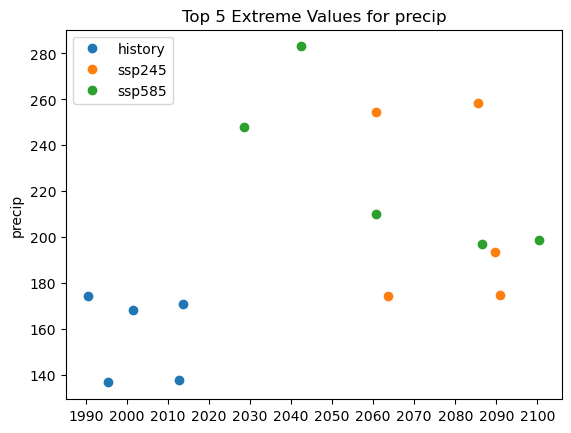

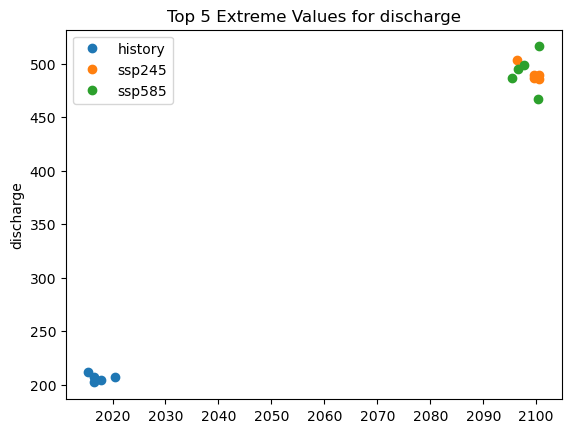

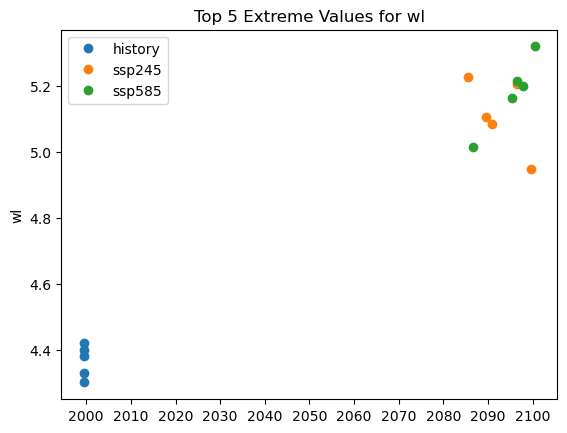

In [20]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import pandas as pd

# For each variable do the same operations
variables = ['precip', 'discharge', 'wl']
scenarios = ['history', 'ssp245', 'ssp585']

# Assuming the date format is '%Y-%m-%d'
date_format = '%Y-%m-%d'

for variable in variables:
    fig, ax = plt.subplots()
    
    for scenario in scenarios:
        # Get the variable and scenario dataset
        dataset = globals()[f'{variable}_{scenario}']
        
        # Convert date strings to datetime objects
        dataset.index = pd.to_datetime(dataset.index, format=date_format)
        
        # Get the top 5 extreme values and their dates
        top5 = dataset.nlargest(5)

        # Save the results to a CSV file
        top5.to_csv(f'top5_{variable}_{scenario}.csv')
        
        # Plot the top 5 extreme values
        ax.plot(top5.index, top5.values, marker='o', linestyle='', label=scenario)
        
    ax.set_title(f'Top 5 Extreme Values for {variable}')
    ax.set_ylabel(variable)
    ax.legend()
    
    # Set x-axis tick locator and formatter
    years = mdates.YearLocator(10)  # Set tick locator for every 5 years
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    
    plt.show()